In [30]:
import pandas as pd

In [31]:
df = pd.read_csv("heartDataSet.csv")
df.dropna(subset=["age"])

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [32]:
X = df.drop("target", axis=1)
y = df["target"]

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split

In [34]:
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=5)

In [35]:
dt = DecisionTreeClassifier()

In [36]:
dt.fit(train_X, train_y)

DecisionTreeClassifier()

Gini impurity

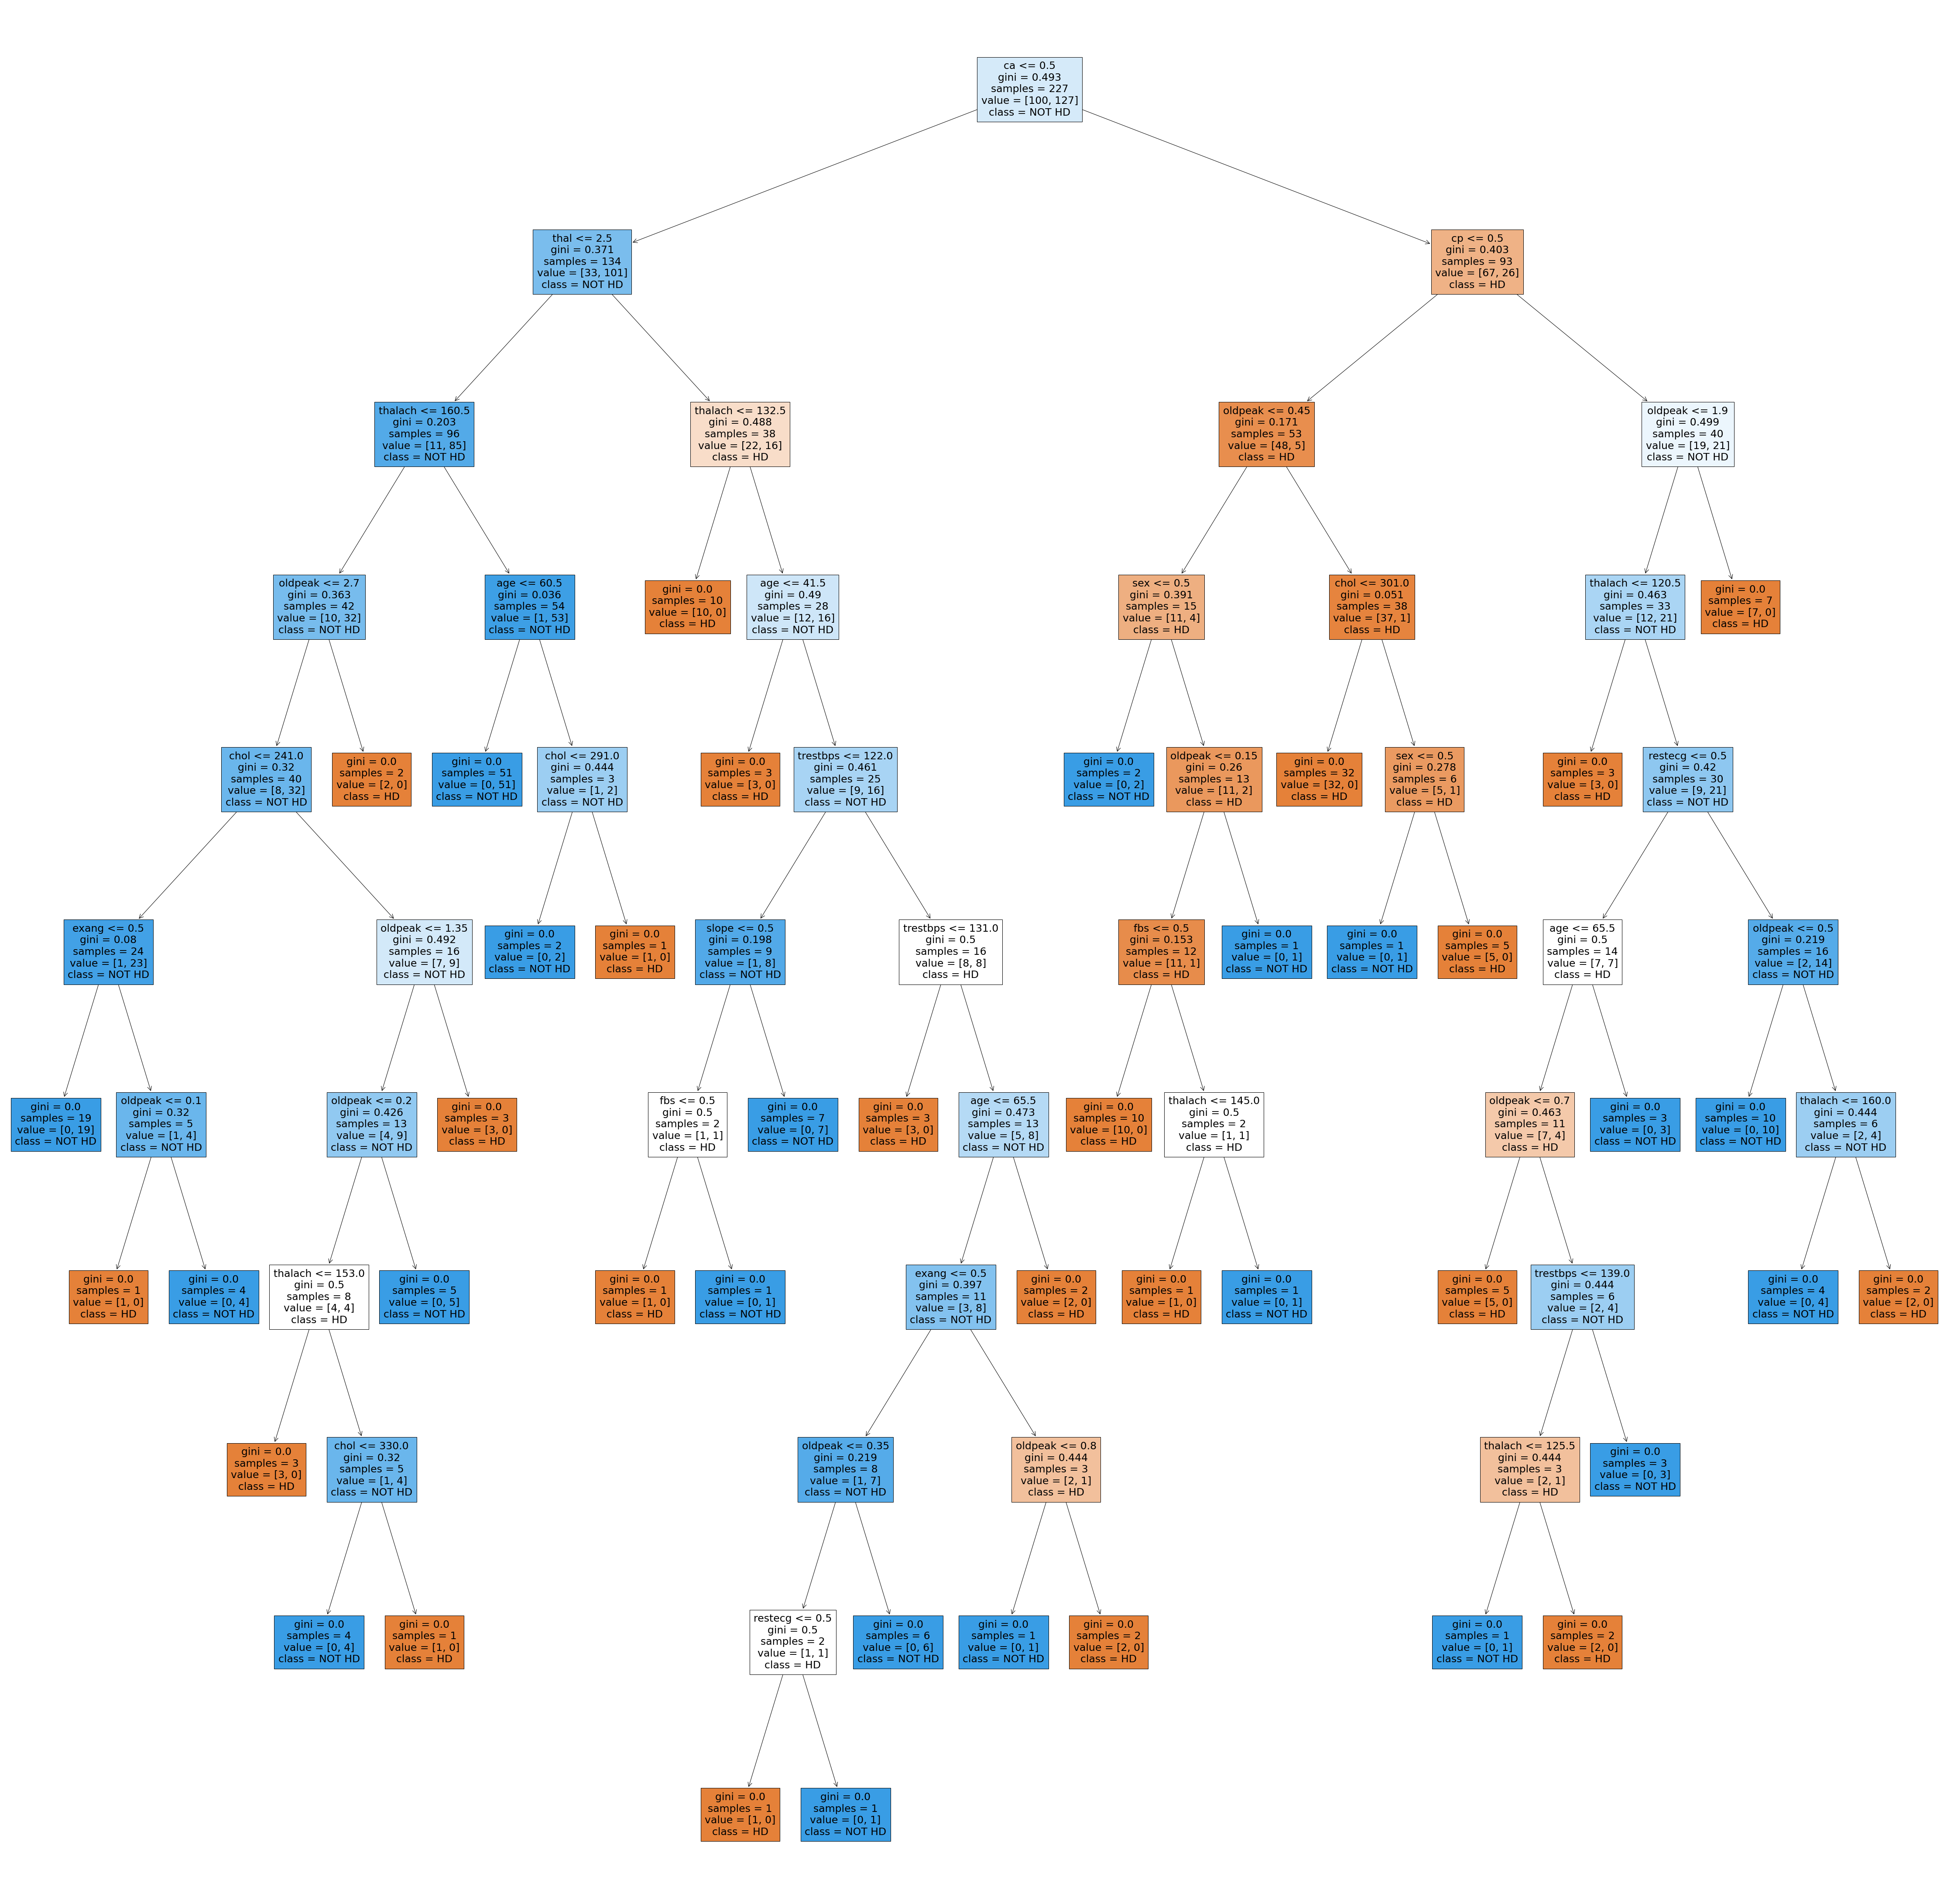

<Figure size 432x288 with 0 Axes>

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(80, 80))
plot_tree(dt, feature_names = train_X.columns, filled=True, class_names=["HD", "NOT HD"])
plt.show()
plt.savefig("dt")

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix, accuracy_score, recall_score, precision_score
import seaborn as sns
import numpy as np

/Users/faisalaldarees/opt/anaconda3/envs/env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


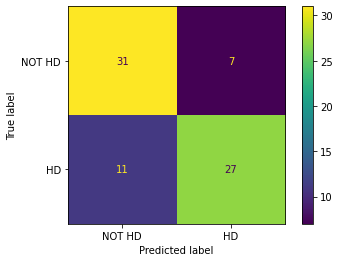

In [39]:
test_predict = dt.predict(test_X)
cpm = confusion_matrix(test_y, test_predict)
plot_confusion_matrix(dt, test_X, test_y, display_labels=["NOT HD", "HD"])

P(neg|NOT HD) = 31/38 = 81.5% -> Precision
P(pos|HD) = 28/38 = 73.6% -> Recall
P() = (31+28) / (31+28+10+7) = 77.6% -> Accuracy 

In [25]:
accuracy_score(test_y, test_predict)

0.7763157894736842

In [26]:
recall_score(test_y, test_predic)

NameError: name 'test_predic' is not defined

In [ ]:
precision_score(test_y, test_predic)

In [ ]:
one_row = df.loc[300]
one_row_x = one_row.drop("target")
one_row_y = one_row.loc["target"]
one_row_y
dt.predict([one_row_x])

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cpm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cpm.flatten()/np.sum(cpm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cpm, annot=labels, fmt="", cmap='Blues')